# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.



## Plan


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [34]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# For displaying all of the columns in dataframes
# pd.set_option('display.max_columns', None)
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
# For data manipulation


In [35]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("salifort_motors_hr.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [36]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [37]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [38]:
# Display all column names
### YOUR CODE HERE ###
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [39]:
# Rename columns as needed
### YOUR CODE HERE ###

new_columns = {
    'Work_accident': 'work_accident',
    'Department': 'department',
    'time_spend_company': 'tenure',
    'average_montly_hours': 'average_monthly_hours'
    }
df0.rename(columns = new_columns, inplace = True)
print(df0.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [40]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [41]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [42]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicates_all = df0[df0.duplicated(keep=False)]
duplicates_all

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  work_accident  left  \
0                        157       3              0     1   
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[5346 rows x 10 columns]

In [43]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

new_df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
new_df.head()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

Text(0, 0.5, 'Tenure')

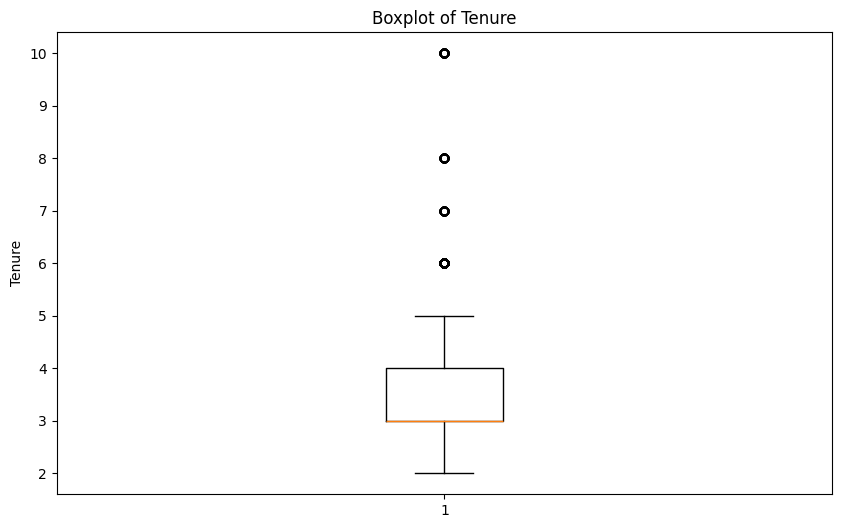

In [44]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure
plt.boxplot(new_df['tenure'])
plt.title('Boxplot of Tenure')  # Optional: Adding a title to the plot
plt.ylabel('Tenure')  # Labeling the y-axis

In [45]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1 = new_df['tenure'].quantile(0.25)
Q3 = new_df['tenure'].quantile(0.75)
# Determine the outliers thresholds
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = new_df[(new_df['tenure'] < lower_bound) | (new_df['tenure'] > upper_bound)]
print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)
print(len(outliers))

Lower limit: 1.5
Upper limit: 5.5
824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [46]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
employed = (new_df['left'] == 0).sum()
resigned = (new_df['left'] == 1).sum()
print(employed)
print(resigned)
total = employed + resigned
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
employed_percentage = employed / total * 100
resigned_percentage = resigned / total * 100
print('Employed percentage: ', employed_percentage)
print('Resigned percentage: ', resigned_percentage)

10000
1991
Employed percentage:  83.39588024351598
Resigned percentage:  16.604119756484028


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

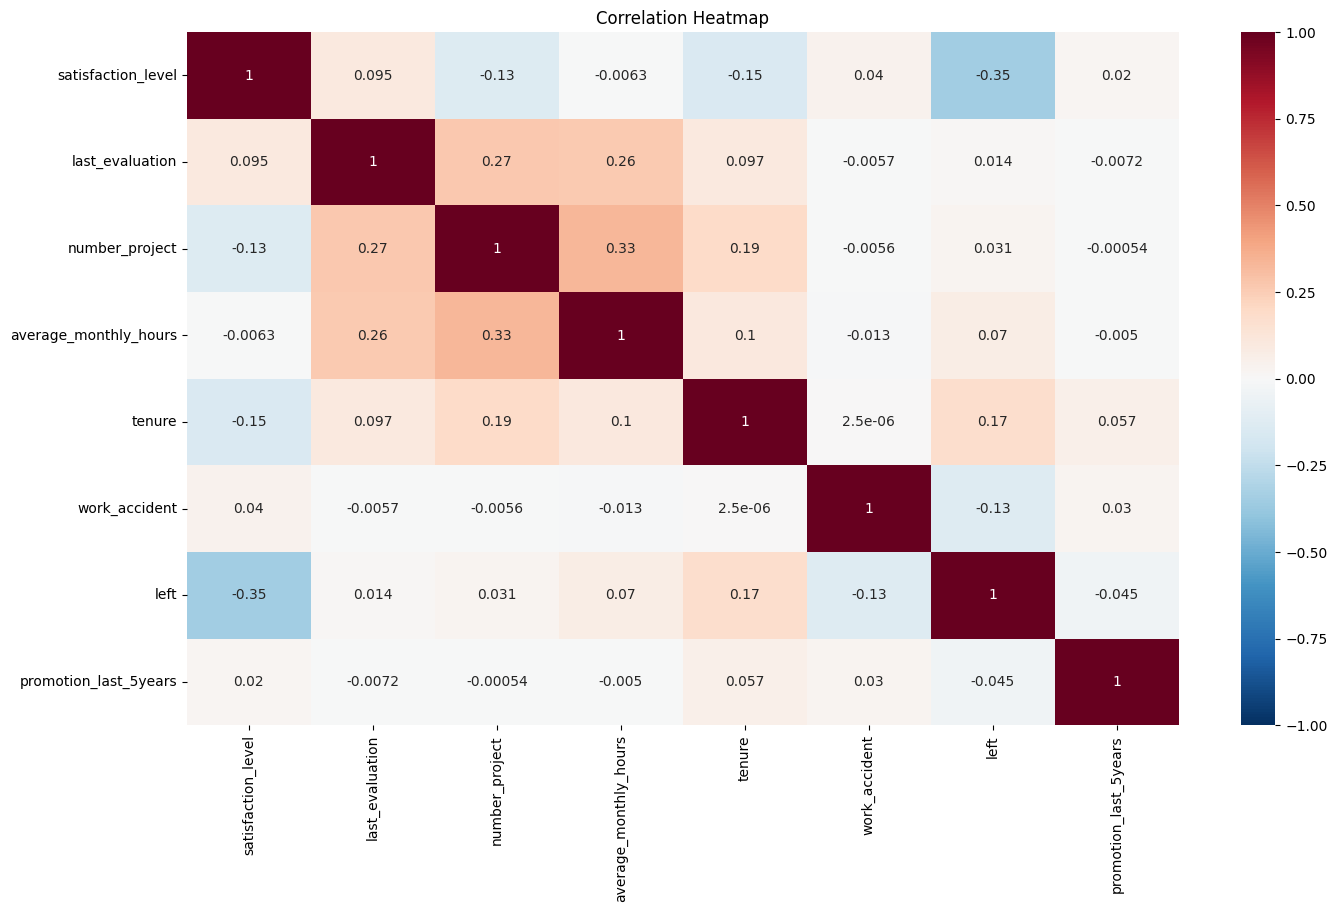

In [47]:

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(new_df.select_dtypes(include=[np.number]).corr(), vmin=-1, annot=True, cmap='RdBu_r')
heatmap.set_title('Correlation Heatmap');

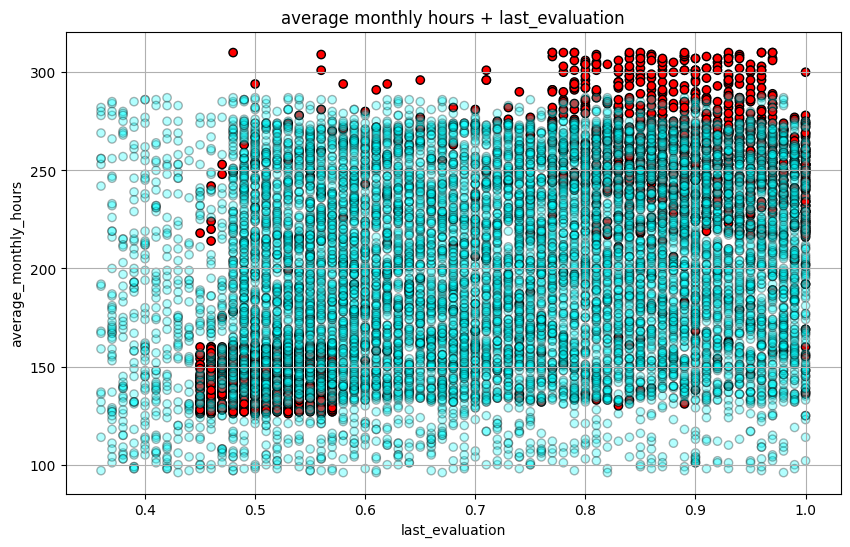

In [48]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(10, 6))
alpha_map = {0: 0.3, 1: 1.0}
plt.scatter(new_df['last_evaluation'], new_df['average_monthly_hours'], c=new_df['left'].map({0: 'cyan', 1: 'red'}), edgecolor='k',alpha=new_df['left'].map(alpha_map))
plt.title('average monthly hours + last_evaluation')
plt.xlabel('last_evaluation')
plt.ylabel('average_monthly_hours')
plt.grid(True)
plt.show();


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


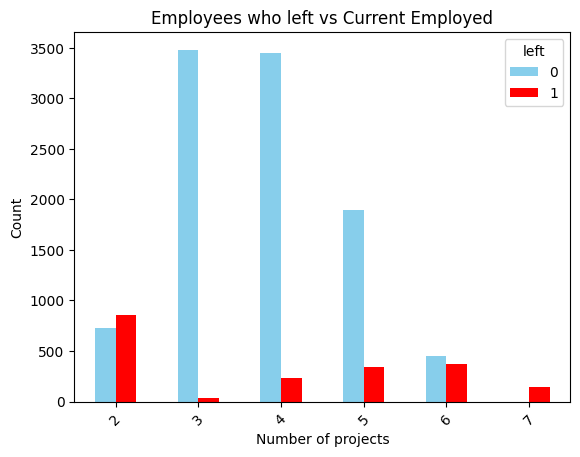

In [49]:
# Create a plot as needed
### YOUR CODE HERE ###
new_df['salary']
print(df0.columns)
print(new_df.columns)


# Group by department and count
department_left_counts = new_df.groupby(['number_project', 'left']).size().unstack(fill_value=0)

# Plotting
department_left_counts.plot(kind='bar', color=['skyblue','red'])
plt.xlabel('Number of projects')
plt.ylabel('Count')
plt.title('Employees who left vs Current Employed')
plt.xticks(rotation=45)
plt.show()

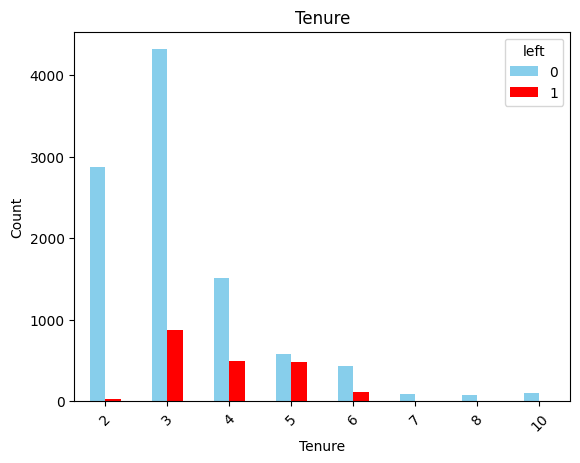

In [50]:
department_left_counts = new_df.groupby(['tenure', 'left']).size().unstack(fill_value=0)

# Plotting
department_left_counts.plot(kind='bar', color=['skyblue','red'])
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure')
plt.xticks(rotation=45)
plt.show()


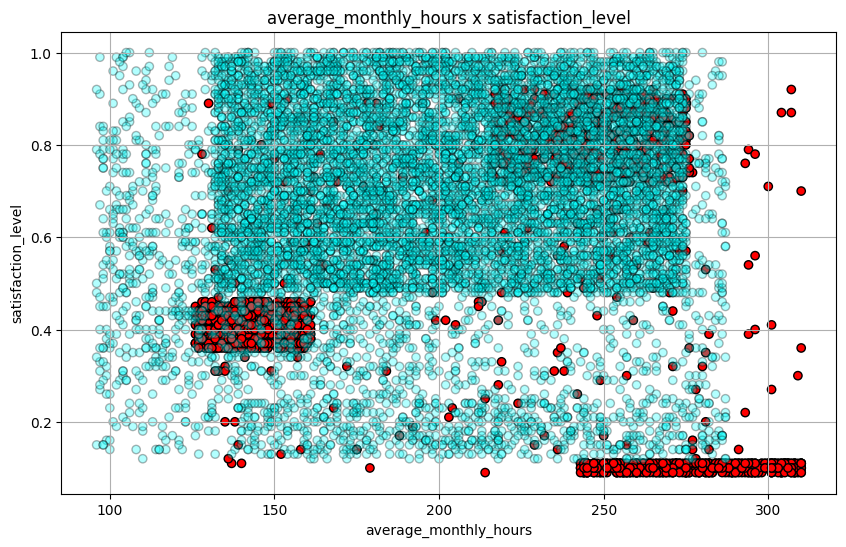

satisfaction_level        92
last_evaluation           65
number_project             6
average_monthly_hours    215
tenure                     8
work_accident              2
left                       2
promotion_last_5years      2
department                10
salary                     3
dtype: int64


In [51]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
alpha_values = new_df['left'].map({0: 0.3, 1: 1.0})
plt.scatter(new_df['average_monthly_hours'], new_df['satisfaction_level'], c=new_df['left'].map({0: 'cyan', 1: 'red'}), edgecolor='k', alpha=alpha_values)
plt.title('average_monthly_hours x satisfaction_level')
plt.xlabel('average_monthly_hours')
plt.ylabel('satisfaction_level')
plt.grid(True)
plt.show();

unique_counts = new_df.nunique()

print(unique_counts)


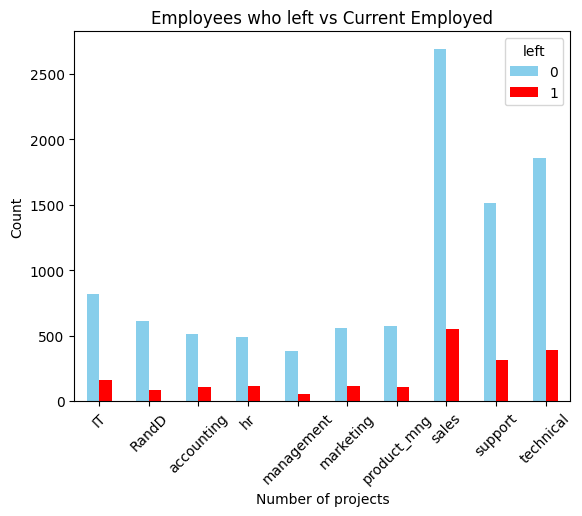

In [52]:
department_left_counts = new_df.groupby(['department', 'left']).size().unstack(fill_value=0)

# Plotting
department_left_counts.plot(kind='bar', color=['skyblue','red'])
plt.xlabel('Number of projects')
plt.ylabel('Count')
plt.title('Employees who left vs Current Employed')
plt.xticks(rotation=45)
plt.show()

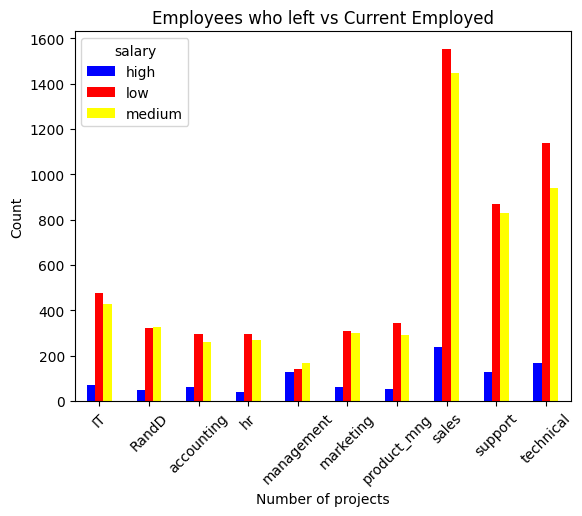

In [53]:
department_left_counts = new_df.groupby(['department', 'salary']).size().unstack(fill_value=0)

# Plotting
department_left_counts.plot(kind='bar', color=['blue','red', 'yellow'])
plt.xlabel('Number of projects')
plt.ylabel('Count')
plt.title('Employees who left vs Current Employed')
plt.xticks(rotation=45)
plt.show()

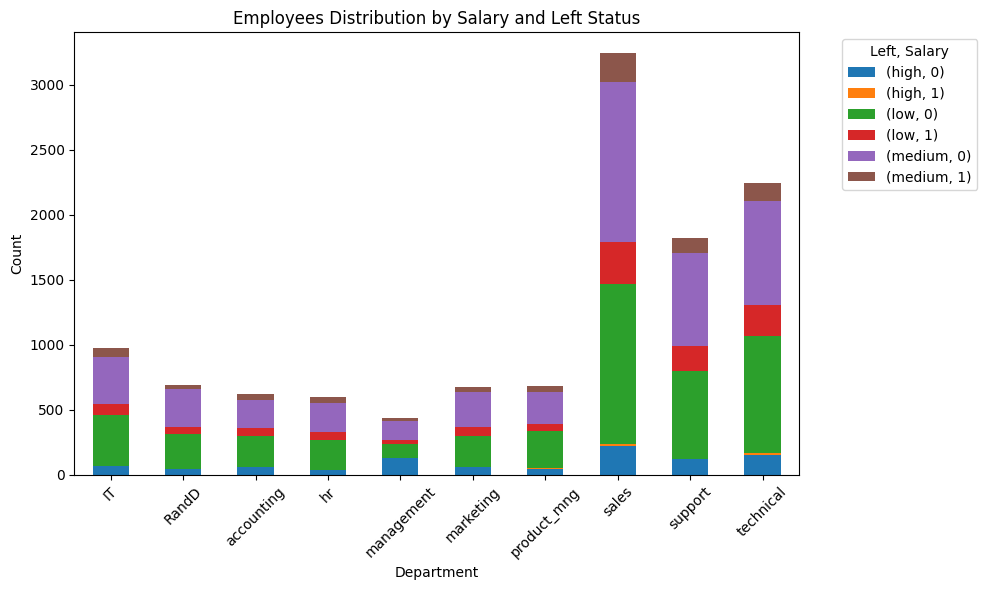

In [54]:
department_salary_left_counts = new_df.groupby(['department', 'left', 'salary']).size()
department_salary_left_counts = department_salary_left_counts.unstack(level=-1).unstack(level=-1, fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
department_salary_left_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Department')
ax.set_ylabel('Count')
ax.set_title('Employees Distribution by Salary and Left Status')
plt.xticks(rotation=45)
plt.legend(title='Left, Salary', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

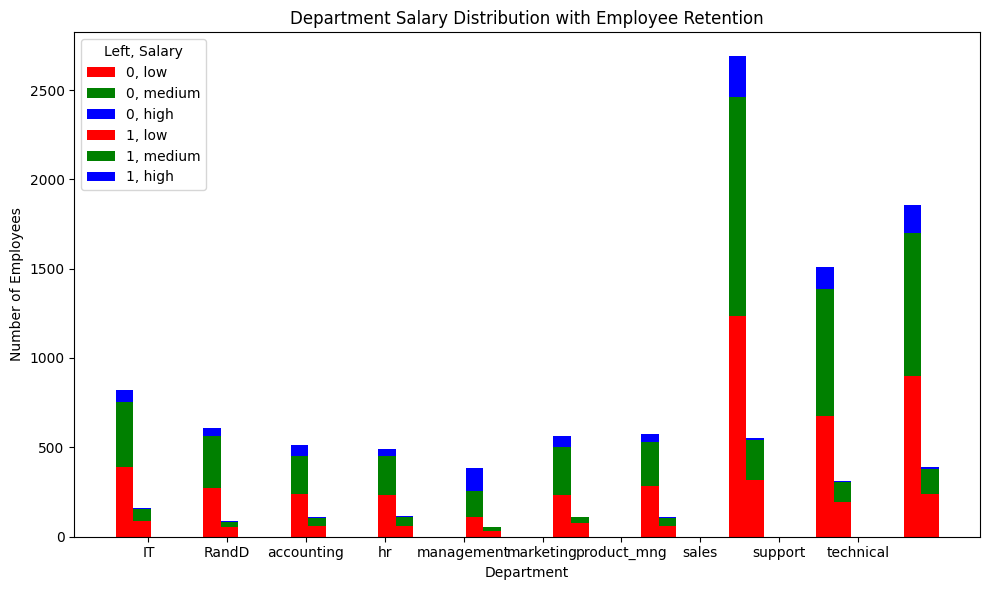

In [55]:
# Create a pivot table
pivot_table = new_df.pivot_table(index='department', columns=['left', 'salary'], aggfunc='size', fill_value=0)

# Plotting with adjustment
fig, ax = plt.subplots(figsize=(10, 6))

# To create side-by-side bars for each 'left' category and stack by 'Salary'
colors = ['red', 'green', 'blue']  # Colors for low, medium, high
left_categories = pivot_table.columns.levels[0]  # This should be [0, 1]
salary_categories = ['low', 'medium', 'high']  # Ensure sorted order if necessary
numeric_indices = np.arange(len(pivot_table.index))  # Create a numeric array for positions
bar_width = 0.35  # Width of each bar
group_width = 0.2  # Space between groups of bars (left = 0 and left = 1)
num_departments = len(pivot_table.index)

indices = np.arange(num_departments) * (2 * bar_width + group_width)
# We iterate over each 'left' status to create grouped bars
for i, status in enumerate(left_categories):
    # Generate position for each bar group based on status
    position =numeric_indices + 0.2 * (i - 0.5)
    # Plot each salary category as a part of the stack
    bottom = None
    for salary in salary_categories:
        ax.bar(position, pivot_table[(status, salary)], bottom=bottom, label=f'{status}, {salary}', color=colors[salary_categories.index(salary)], width=0.2)
        bottom = pivot_table[(status, salary)] if bottom is None else bottom + pivot_table[(status, salary)]

ax.set_title('Department Salary Distribution with Employee Retention')
ax.set_xlabel('Department')
ax.set_ylabel('Number of Employees')
plt.xticks(ticks=indices + bar_width / 2, labels=pivot_table.index, rotation=0)
plt.legend(title='Left, Salary',  loc='upper left')
plt.tight_layout()
plt.show()

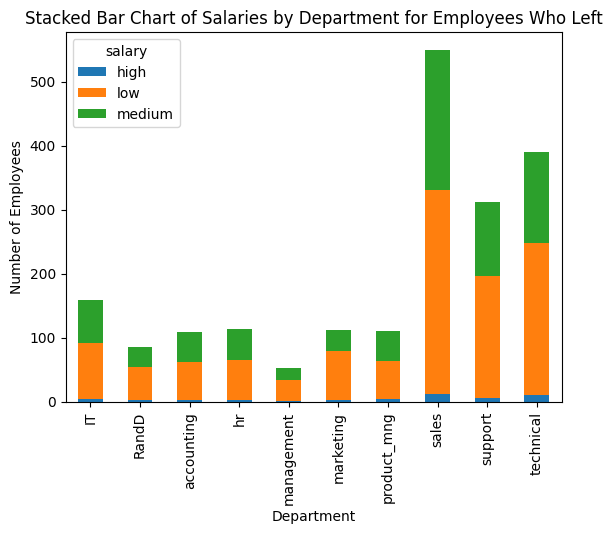

In [56]:

# Filter only those who have left
df_left = new_df[new_df['left'] == 1]

# Create a cross-tabulation of Department and Salary
ct = pd.crosstab(df_left['department'], df_left['salary'])

# Plot a stacked bar chart
ct.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salaries by Department for Employees Who Left')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

In [57]:
### YOUR CODE HERE ###
df = pd.get_dummies(new_df, columns=['department', 'salary'], drop_first=True)
df.dtypes
X = df.drop('left', axis=1)
y = df['left']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_1, y_train_1)

y_pred = clf.predict(X_test_1)


Accuracy: 0.8332638599416423
Precision: 0.5035971223021583
Recall: 0.1745635910224439
F1 Score: 0.25925925925925924
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1998
           1       0.50      0.17      0.26       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.58      2399
weighted avg       0.80      0.83      0.80      2399



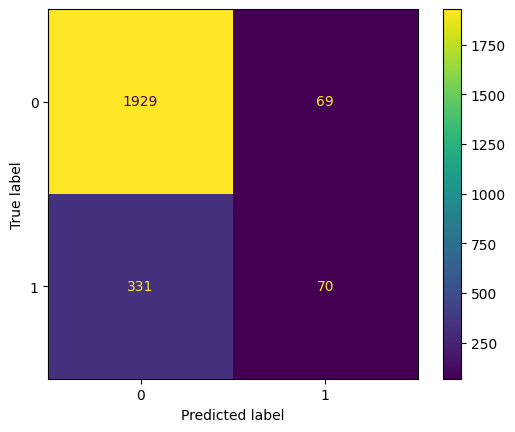

In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test_1, y_pred)
precision = precision_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred)
f1 = f1_score(y_test_1, y_pred)
conf_matrix = confusion_matrix(y_test_1, y_pred)
report = classification_report(y_test_1, y_pred)
# Print the evaluation metrics

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
ConfusionMatrixDisplay.from_predictions(y_test_1, y_pred)
print("Classification Report:\n", report)

In [59]:
dt = DecisionTreeClassifier(random_state = 42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
    'min_samples_leaf': [2, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
}
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [60]:
# The verbose parameter in many functions and methods within Python libraries, 
#such as scikit-learn, controls the amount of messages (usually about the internal 
#processing) that are printed to the console during execution.

# How verbose works in GridSearchCV:
# verbose=0 (default): No messages are displayed.
# verbose=1: Shows the progress for each cross-validation fold, displaying the number of 
#            the currently processed fold.
# verbose=2: Displays more detailed messages including the score during the model 
#            fitting process and more.
# verbose=3 or higher: Some functions may provide even more detailed diagnostic 
#           information at higher verbose levels, showing detailed computation steps 
#           and timings, which can be useful for debugging or detailed analysis.
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           scoring = scoring, 
                           refit='f1',
                           return_train_score=True)


# Fit the model
grid_search.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10]},
             refit='f1', return_train_score=True,
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=1)

In [61]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [62]:
print("Best Avg. Validation Score: ", "%.4f" % grid_search.best_score_)
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                         }
                        )
  
    return table

result_table = make_results("Tuned Decision Tree", grid_search)
result_table

Best Avg. Validation Score:  0.9498


Model        F1   Recall  Precision  Accuracy
0  Tuned Decision Tree  0.949815  0.92327   0.978206  0.983841

Accuracy: 0.9791579824927052
Precision: 0.9705093833780161
Recall: 0.9027431421446384
F1 Score: 0.9354005167958657
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



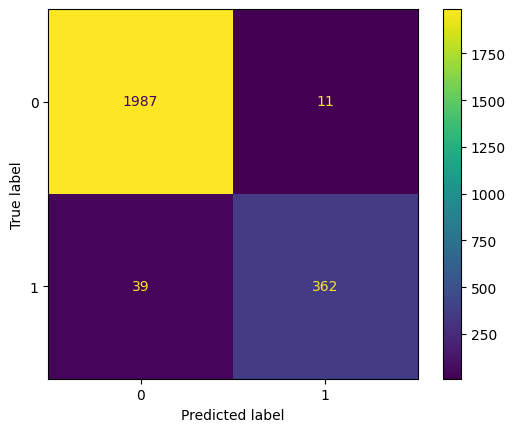

In [63]:
best_estimator = grid_search.best_estimator_
y_pred_decistion_tree = best_estimator.predict(X_test_2)
accuracy = accuracy_score(y_test_2, y_pred_decistion_tree)
precision = precision_score(y_test_2, y_pred_decistion_tree)
recall = recall_score(y_test_2, y_pred_decistion_tree)
f1 = f1_score(y_test_2, y_pred_decistion_tree)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

report = classification_report(y_test_2, y_pred_decistion_tree)
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred_decistion_tree)
print("Classification Report:\n", report)

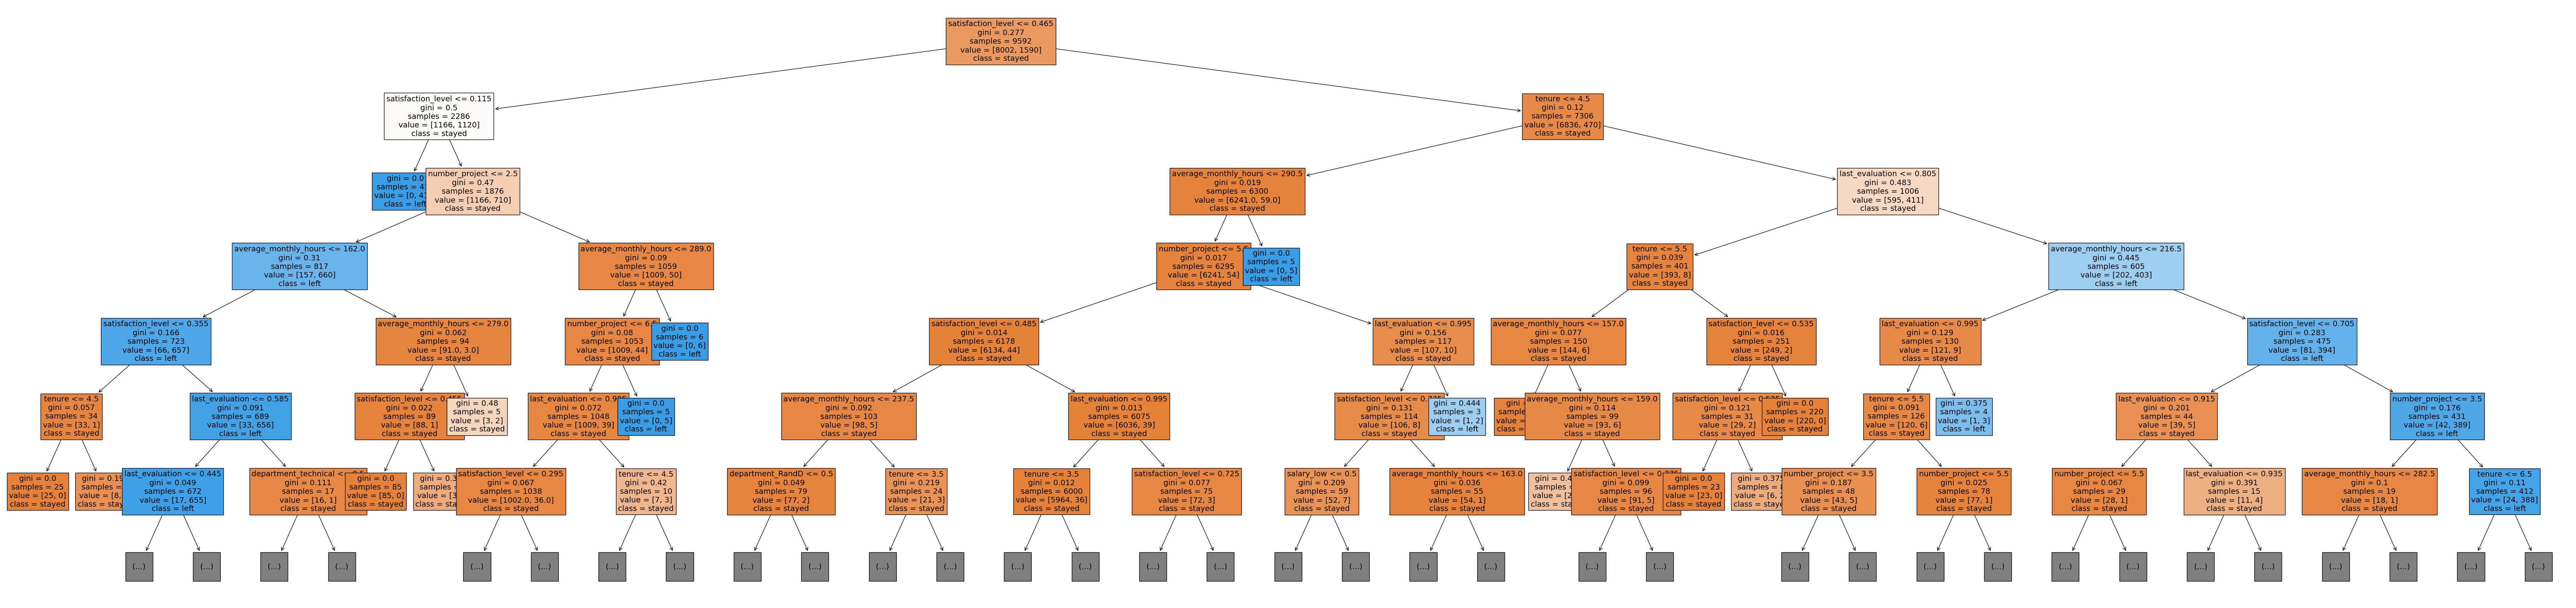

In [64]:
from sklearn.tree import plot_tree
plt.figure(figsize=(85,20))
plot_tree(best_estimator, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

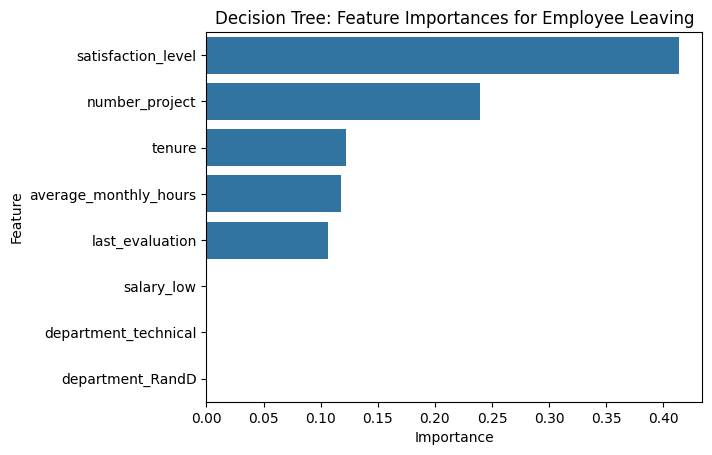

In [65]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(best_estimator.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [66]:
cv_params = {'n_estimators' : [20, 50,100, 150], 
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
              'min_samples_leaf' : [0.5,1,2, 5, 10, 20, 50], 
              'min_samples_split' : [0.001, 0.01, 2, 5, 10],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Rows marked as 0 in the split_index list are indeed the validation rows.

# Does the split_index with 0s indicate the validation rows?
# In the split_index list:

# Rows marked with 0 correspond to the indices of X_train that are part of the validation set (X_val).
# Rows marked with -1 correspond to the indices of X_train that are part of the training set (X_tr).
# This list is used by PredefinedSplit to ensure that the cross-validation process consistently uses the same rows for validation in each fold of the cross-validation.
X_tr, X_val, y_tr, y_val = train_test_split(X_train_3, y_train_3, test_size = 0.25, random_state = 0)
split_index = [0 if x in X_val.index else -1 for x in X_train_3.index]
custom_split = PredefinedSplit(split_index)
rf = RandomForestClassifier(random_state=0)
rf_with_fixed_validation = GridSearchCV(rf, param_grid=cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)
rf_val = GridSearchCV(rf, param_grid=cv_params, cv=5, refit='f1', n_jobs = -1, verbose = 1, scoring=scoring)




In [67]:
rf_with_fixed_validation.fit(X_train_3, y_train_3)

Fitting 1 folds for each of 3920 candidates, totalling 3920 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'max_features': ['sqrt'], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1, 2, 5, 10, 20, 50],
                         'min_samples_split': [0.001, 0.01, 2, 5, 10],
                         'n_estimators': [20, 50, 100, 150]},
             refit='f1', verbose=1)

In [68]:
rf_val.fit(X_train_3, y_train_3)

Fitting 5 folds for each of 3920 candidates, totalling 19600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'max_features': ['sqrt'], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1, 2, 5, 10, 20, 50],
                         'min_samples_split': [0.001, 0.01, 2, 5, 10],
                         'n_estimators': [20, 50, 100, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [69]:
rf_val.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [70]:
rf_with_fixed_validation.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [71]:
rf_with_fixed_validation.best_estimator_

RandomForestClassifier(max_depth=15, max_samples=0.9, min_samples_split=10,
                       n_estimators=50, random_state=0)

In [72]:
print(rf_with_fixed_validation.best_score_)
print(rf_val.best_score_)

0.9835482436638506
0.9456504824225226


In [73]:
y_pred_with_fixed_validation = rf_with_fixed_validation.best_estimator_.predict(X_test_3)
y_pred_rf_val = rf_val.best_estimator_.predict(X_test_3)

Accuracy: 0.9859906604402935
Precision: 0.9820627802690582
Recall: 0.9279661016949152
F1 Score: 0.954248366013072
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2526
           1       0.98      0.93      0.95       472

    accuracy                           0.99      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



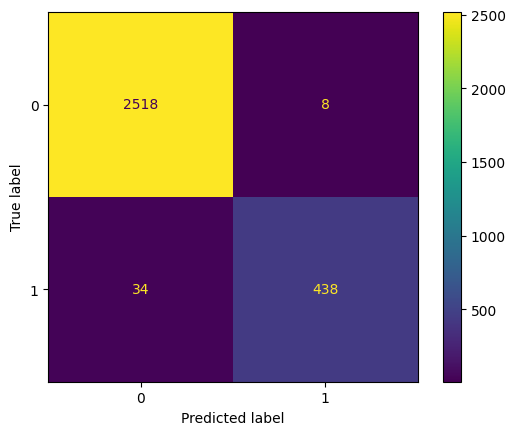

In [74]:
accuracy = accuracy_score(y_test_3, y_pred_rf_val)
precision = precision_score(y_test_3, y_pred_rf_val)
recall = recall_score(y_test_3, y_pred_rf_val)
f1 = f1_score(y_test_3, y_pred_rf_val)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

report = classification_report(y_test_3, y_pred_rf_val)
ConfusionMatrixDisplay.from_predictions(y_test_3, y_pred_rf_val)
print("Classification Report:\n", report)

Accuracy: 0.9853235490326885
Precision: 0.9776785714285714
Recall: 0.9279661016949152
F1 Score: 0.9521739130434783
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2526
           1       0.98      0.93      0.95       472

    accuracy                           0.99      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



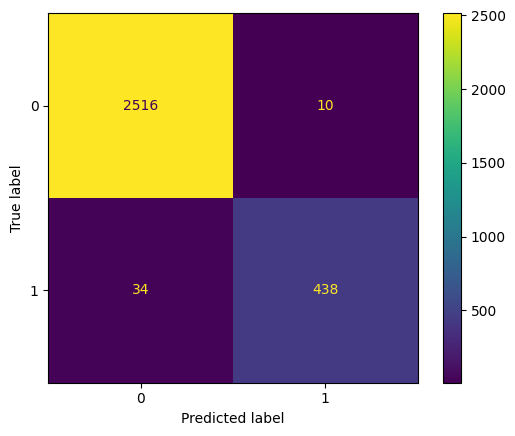

In [75]:
accuracy = accuracy_score(y_test_3, y_pred_with_fixed_validation)
precision = precision_score(y_test_3, y_pred_with_fixed_validation)
recall = recall_score(y_test_3, y_pred_with_fixed_validation)
f1 = f1_score(y_test_3, y_pred_with_fixed_validation)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
report = classification_report(y_test_3, y_pred_with_fixed_validation)
ConfusionMatrixDisplay.from_predictions(y_test_3, y_pred_with_fixed_validation)
print("Classification Report:\n", report)

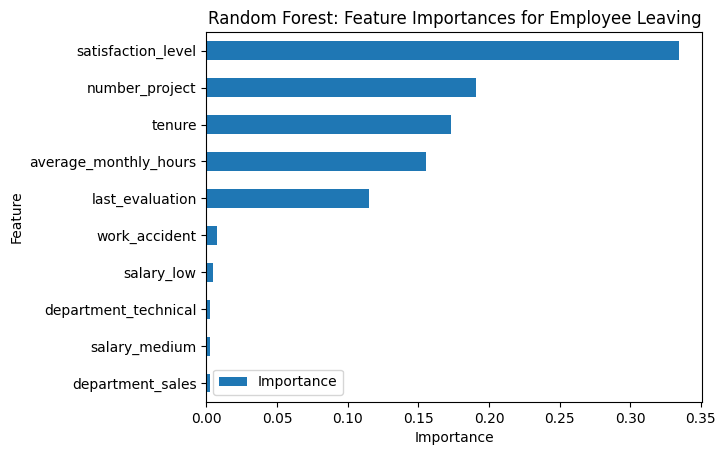

In [76]:
# Get feature importances
feat_impt = rf_val.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(feat_impt, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [77]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = 0.25, random_state = 0)
xgb_cv = GridSearchCV(xgb,
                      xgb_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )
xgb_cv = xgb_cv.fit(X_train_4, y_train_4)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Accuracy: 0.9846564376250834
Precision: 0.9863013698630136
Recall: 0.9152542372881356
F1 Score: 0.9494505494505494
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2526
           1       0.99      0.92      0.95       472

    accuracy                           0.98      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998

AUC: 0.9564394701880108
0.9564394701880108


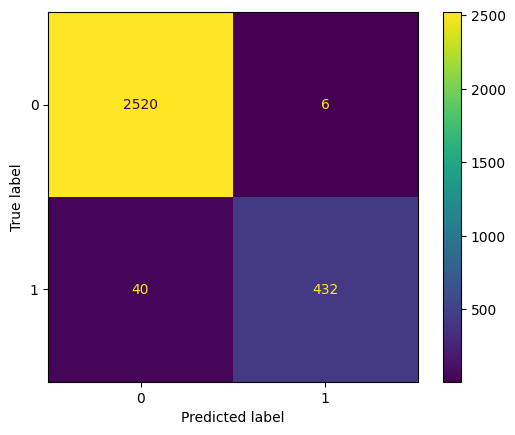

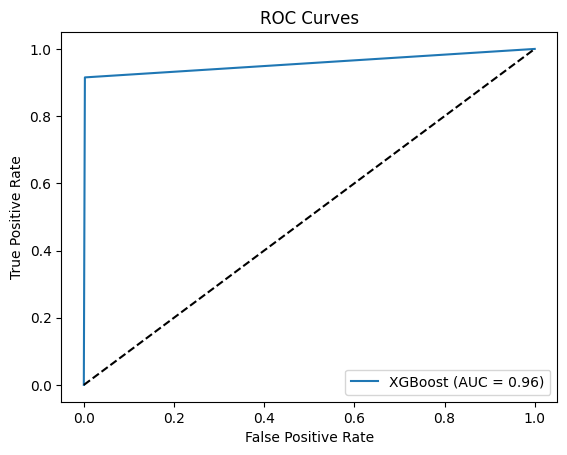

In [78]:
xgb_cv.best_params_
xgb_y_pred = xgb_cv.predict(X_test_4)
accuracy = accuracy_score(y_test_4, xgb_y_pred)
precision = precision_score(y_test_4, xgb_y_pred)
recall = recall_score(y_test_4, xgb_y_pred)
f1 = f1_score(y_test_4, xgb_y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
report = classification_report(y_test_4, xgb_y_pred)
ConfusionMatrixDisplay.from_predictions(y_test_4, xgb_y_pred)
print("Classification Report:\n", report)

xgb_auc = roc_auc_score(y_test_4, xgb_y_pred)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_4, xgb_y_pred)
roc_auc = auc(xgb_fpr, xgb_tpr)
print(f'AUC: {roc_auc}')
print(xgb_auc)
plt.figure()
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
department_RandD             bool
department_accounting        bool
department_hr                bool
department_management        bool
department_marketing         bool
department_product_mng       bool
department_sales             bool
department_support           bool
department_technical         bool
salary_low                   bool
salary_medium                bool
dtype: object


<Figure size 1200x800 with 0 Axes>

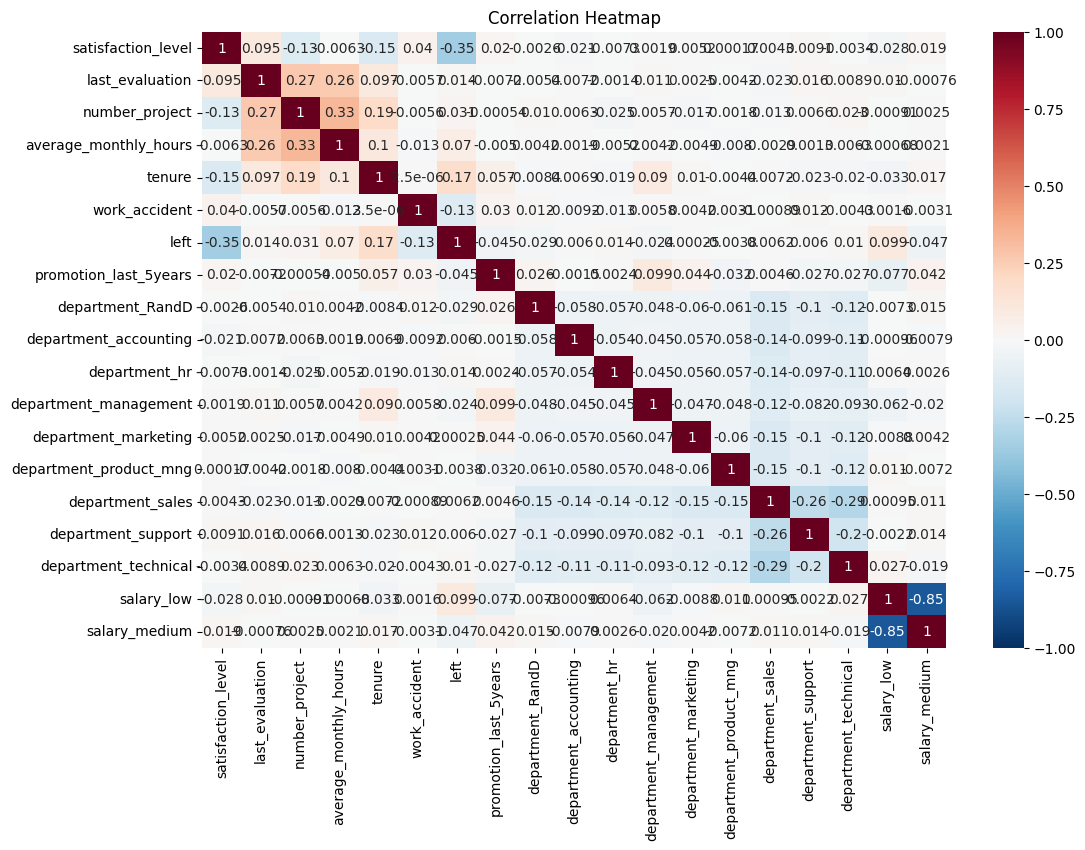

<Figure size 1200x800 with 0 Axes>

In [79]:
print(df.dtypes)
df.head()

plt.figure(figsize=(12, 8)) 
heatmap = sns.heatmap(df.select_dtypes(include=[np.number, bool]).corr(), vmin=-1, annot=True, cmap='RdBu_r')

heatmap.set_title('Correlation Heatmap');
plt.figure(figsize=(12, 8)) 

In [80]:

X = df.drop(['satisfaction_level', 'average_monthly_hours', 'left'], axis=1)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy: 0.8249270529387245
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1998
           1       0.00      0.00      0.00       401

    accuracy                           0.82      2399
   macro avg       0.42      0.50      0.45      2399
weighted avg       0.69      0.82      0.75      2399



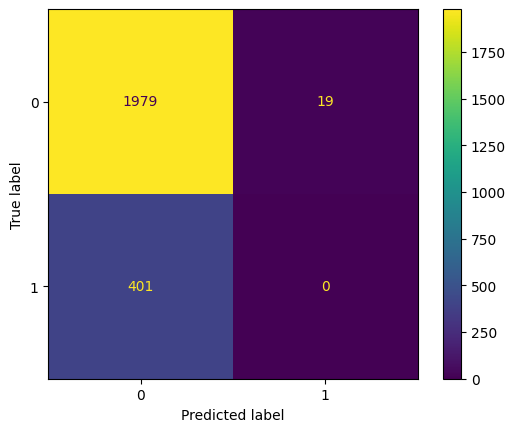

In [81]:
# Logistic Regression Part 2
clf2 = LogisticRegression(max_iter=1000)
clf2.fit(X_train_5, y_train_5)

logistic_y_pred_2 = clf2.predict(X_test_5)

accuracy = accuracy_score(y_test_5, logistic_y_pred_2)
precision = precision_score(y_test_5, logistic_y_pred_2)
recall = recall_score(y_test_5, logistic_y_pred_2)
f1 = f1_score(y_test_5, logistic_y_pred_2)

conf_matrix = confusion_matrix(y_test_5, logistic_y_pred_2)
report = classification_report(y_test_5, logistic_y_pred_2)
# Print the evaluation metrics

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

ConfusionMatrixDisplay.from_predictions(y_test_5, logistic_y_pred_2)
print("Classification Report:\n", report)


Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Accuracy: 0.9533138807836599
Precision: 0.8603491271820449
Recall: 0.8603491271820449
F1 Score: 0.8603491271820449
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1998
           1       0.86      0.86      0.86       401

    accuracy                           0.95      2399
   macro avg       0.92      0.92      0.92      2399
weighted avg       0.95      0.95      0.95      2399



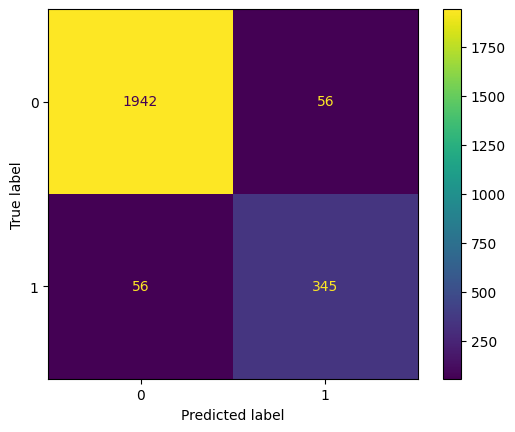

In [82]:
param_grid = {
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
    'min_samples_leaf': [2, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
}
scoring = ['accuracy', 'precision', 'recall', 'f1']
dt = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           scoring = scoring, 
                           refit='f1',
                           return_train_score=True)


# Fit the model
grid_search.fit(X_train_6, y_train_6)
best_estimator_2 = grid_search.best_estimator_
y_pred_2_decistion_tree = best_estimator_2.predict(X_test_6)
accuracy = accuracy_score(y_test_6, y_pred_2_decistion_tree)
precision = precision_score(y_test_6, y_pred_2_decistion_tree)
recall = recall_score(y_test_6, y_pred_2_decistion_tree)
f1 = f1_score(y_test_6, y_pred_2_decistion_tree)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

report = classification_report(y_test_6, y_pred_2_decistion_tree)
ConfusionMatrixDisplay.from_predictions(y_test_6, y_pred_2_decistion_tree)
print("Classification Report:\n", report)